In [3]:
# importing neccessary packages
import sys, os
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
sns.set_style("darkgrid")
%matplotlib inline

In [6]:
# Loading dataset
data = pd.read_csv('../data/Amharic_News_Dataset.csv')

In [5]:
# Dispalying head
data.head()

,headline,category,date,views,article,link
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012


In [7]:
# list of columns
data.columns

Index(['headline', 'category', 'date', 'views', 'article', 'link'], dtype='object')

In [8]:
# data inforamtion 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51483 entries, 0 to 51482
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  51470 non-null  object
 1   category  51482 non-null  object
 2   date      51483 non-null  object
 3   views     51483 non-null  object
 4   article   51483 non-null  object
 5   link      51483 non-null  object
dtypes: object(6)
memory usage: 2.4+ MB


In [9]:
# size of data
len(data)

51483

In [11]:
data.isnull()

,headline,category,date,views,article,link
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
51478,False,False,False,False,False,False
51479,False,False,False,False,False,False
51480,False,False,False,False,False,False
51481,False,False,False,False,False,False


In [12]:
data = data.dropna(subset=['article'])

In [13]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,headline,category,date,views,article,link,word_len
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,ስፖርት,"January 14, 2021",2,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...,https://www.press.et/Ama/?p=39481,298
1,አዲስ ዘመን ድሮ,መዝናኛ,"December 28, 2020",4,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...,https://www.press.et/Ama/?p=38334,475
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,ስፖርት,"January 6, 2021",6,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...,https://www.press.et/Ama/?p=39010,265
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,ስፖርት,"January 6, 2021",5,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...,https://www.press.et/Ama/?p=39011,296
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,ስፖርት,"January 6, 2021",12,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...,https://www.press.et/Ama/?p=39012,476


In [14]:
data['link'].value_counts()

https://amharic.voanews.com//a/london-marathon/5608398.html                                                                                                                                                                      3
https://amharic.voanews.com//a/ethiopia-tigrai-mekele/5679989.html                                                                                                                                                               3
https://amharic.voanews.com//a/ethiopia-political-crisis-tplf-and-adp-voa-crossfire-alula-kebede-july-2019/4998828.html                                                                                                          3
https://amharic.voanews.com//a/bale-roba-road-closure/5461608.html                                                                                                                                                               3
https://amharic.voanews.com//a/covid-main/5443343.html                                      

In [15]:
data.word_len.mean()

248.9586853912942

In [16]:
data.category.unique()

array(['ስፖርት', 'መዝናኛ', 'ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ', nan],
      dtype=object)

In [18]:
data['article'][0]

'ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻምፒዮና በአዲስ አበባ ከተማ በመካሄድ ላይ ይገኛል። የተሻለ ብቃት ያሳዩ ቦክሰኞች ለቶኪዮ ኦሊምፒክ ማጣሪያ ተሳታፊ እንደሚሆኑም ታውቋል።በቦክስ ስፖርት ከሚካሄዱት ዓመታዊ ቻምፒዮናዎች መካከል አንዱ በክለቦች መካከል የሚካሄደው ነው፤ የዚህ ውድድር የመጀመሪያው ዙር በአዲስ አበባ ከተማ ተጀምሯል። የኢትዮጵያ ቦክስ ፌዴሬሽን ከአዲስ አበባ ቦክስ ፌዴሬሽን ጋር በመተባበር በተዘጋጀው በዚህ ቻምፒዮና፤ ከኮቪድ 19 ወረርሽኝ መከሰት በኋላ ለመጀመሪያ ጊዜ የተካሄደ ውድድርም ነው። በውድድሩም ላይ አምስት ክለቦች ከአዲስ አበባ (ፌዴራልፖሊስ፣ ፌዴራል ማረሚያ ቤቶች፣ አዲስ አበባ ፖሊስ፣ የኢትዮጵያ ወጣቶች ስፖርት አካዳሚ እና ኦሞቲክ ቦክስ)፣ ሁለት ክለቦች ከአማራ ክልል (ጎንደር ከነማ እና ደሴ ከነማ) እንዲሁም ድሬዳዋ ከነማ በድምሩ ስምንት ክለቦች ተሳታፊ መሆናቸውን የኢትዮጵያ ቦክስ ፌዴሬሽን መረጃ ያሳያል። በአጠቃላይ ክለቦቻቸውን ወክለውም 12 ሴትና 76 ወንድ ቦክሰኞች በጥቅሉ 88 ተወዳዳሪዎች ተሳታፊ ይሆናሉ። ውድድሩ የሚካሄደው በራስ ኃይሉ ስፖርት ትምህርትና ስልጠና ማዕከል ሲሆን፤ በ10 ክብደቶች በ49፣ 52፣ 57፣ 60፣ 63፣ 69፣ 70፣ 81፣ 89 እና 91 ኪሎ ግራሞች እየተካሄደም ይገኛል። የቦክስ ስፖርት ከንክኪ ስፖርቶች መካከል አንዱ እንደመሆኑ ጨዋታው በሚካሄድበት ወቅት ቦክሰኞቹ አካላዊ ቅርርብ ሊያደርጉ እና ሊነካኩ ይችላሉ። በመሆኑም በዚህ ረገድ ውድድሩ ሙሉ ለሙሉ የኮቪድ 19 ጥንቃቄን በተላበሰ መልኩ እየተካሄደ መሆኑን ነው ፌዴሬሽኑ ያረጋገጠው። ይኸውም ተወዳዳሪዎችና አሰልጣኞች የኮቪድ ምርመራ እንዲያደርጉና ከሌሎች ሰዎች ጋር እንዳይገናኙ በካምፕ እንዲቆዩ በማድረግ ነው። ከዚህ

In [15]:
data['category'] = data['category'].replace(['መዝናኛ', 'ስፖርት','ሀገር አቀፍ ዜና', 'ቢዝነስ', 'ዓለም አቀፍ ዜና', 'ፖለቲካ'],['entertainment',
                        'sport','world_news','busniess', 'country_news', 'politica'] )

<AxesSubplot: >

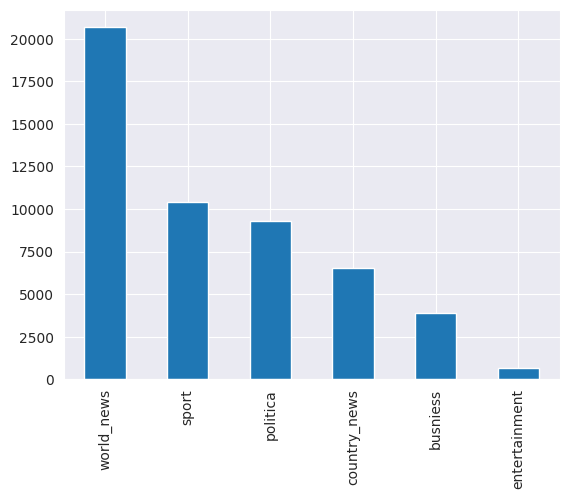

In [16]:
data['category'].value_counts().plot(kind='bar')

In [17]:
df = data.drop(['link', 'date', 'views'], axis=1)
df.head()

,headline,category,article
0,የኦሊምፒክ ማጣሪያ ተሳታፊዎች የሚለዩበት ቻምፒዮና እየተካሄደ ይገኛል,sport,ብርሃን ፈይሳየኢትዮጵያ ቦክስ ፌዴሬሽን በየዓመቱ የሚያዘጋጀው የክለቦች ቻ...
1,አዲስ ዘመን ድሮ,entertainment,የአዲስ ዘመን ጋዜጣ ቀደምት ዘገባዎች በእጅጉ ተነባቢ ዛሬም ላገኛቸው በ...
2,የአረንጓዴ ጎርፍ በጎ አድራጎት አምባሳደሮች ተሰየሙ,sport,ቦጋለ አበበየአዲስ አበባ ከተማ አስተዳደር ስፖርት ኮሚሽን ከኢትዮጵያ አረ...
3,የሊጉ በቢዝነስ ሞዴል መመራት አበረታች ጅምር መሆኑ ተገለጸ,sport,ብርሃን ፈይሳአዲስ አበባ፡- የኢትዮጵያ ፕሪምየር ሊግ በሼር ካምፓኒ እንዲ...
4,የኦሊምፒክ ሥራ አስፈፃሚው እስከ ቶኪዮ ኦሊምፒክ ማግስት ይቀጥላል,sport,ቦጋለ አበበ የኢትዮጵያ ኦሊምፒክ ኮሚቴ አርባ አምስተኛ መደበኛ ጠቅላላ ጉ...
